In [1]:
'''importing required libraries'''

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
try:
    import cPickle as pickle
except ImportError: 
    import pickle

In [2]:
'''importing required libraries'''

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from sklearn.metrics import confusion_matrix
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from PIL import Image
import pydot
import graphviz

Using TensorFlow backend.


In [3]:
'''opens features.p and return all splits in it'''

def load_dataset():
    with open('features.p', 'rb') as fp:
        features = pickle.load(fp)
    X_train, Y_train, X_test, Y_test = features["data_train"], features["labels_train"], features["data_test"], features["labels_test"]
    return X_train, Y_train, X_test, Y_test

In [4]:
'''printing sizes of all splits and loading data'''

X_train, Y_train, X_test, Y_test = load_dataset()

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 996
number of test examples = 249
X_train shape: (996, 96, 96, 3)
Y_train shape: (996, 1)
X_test shape: (249, 96, 96, 3)
Y_test shape: (249, 1)


In [5]:
'''extracting input shape from X_train'''

Input_Shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(Input_Shape)

(96, 96, 3)


In [6]:
'''defining model'''

def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), padding = "same", name = 'conv0')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name = "mp0")(X)
    
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(64, (3, 3), strides = (1, 1), padding = "same", name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name = "mp1")(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(128, (3, 3), strides = (1, 1), padding = "same", name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(256, (3, 3), strides = (1, 1), padding = "same", name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name = "mp2")(X)
    
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(512, (3, 3), strides = (1, 1), padding = "same", name = 'conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name = "mp3")(X)
    
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(50, activation = 'relu', name='fc0')(X)
    X = Dense(10, activation = 'relu', name ='fc1')(X)
    X = Dense(1, activation = 'sigmoid', name = 'fc2')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Notesmodel')

    return model

In [7]:
'''creating model'''

NotesModel = model(Input_Shape)

In [8]:
'''compiling NotesModel'''

NotesModel.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [9]:
'''training'''

NotesModel.fit(x = X_train,y = Y_train,epochs = 20 ,batch_size = 32 )

Epoch 1/20
996/996 [==============================] - 118s 119ms/step - loss: 0.1524 - acc: 0.9568
Epoch 2/20
996/996 [==============================] - 118s 118ms/step - loss: 0.0680 - acc: 0.9779
Epoch 3/20
996/996 [==============================] - 123s 124ms/step - loss: 0.0445 - acc: 0.9880
Epoch 4/20
996/996 [==============================] - 116s 117ms/step - loss: 0.0457 - acc: 0.9859
Epoch 5/20
996/996 [==============================] - 117s 117ms/step - loss: 0.0273 - acc: 0.9930
Epoch 6/20
996/996 [==============================] - 122s 122ms/step - loss: 0.0219 - acc: 0.9950
Epoch 7/20
996/996 [==============================] - 118s 118ms/step - loss: 0.0225 - acc: 0.9940
Epoch 8/20
996/996 [==============================] - 121s 121ms/step - loss: 0.0153 - acc: 0.9960
Epoch 9/20
996/996 [==============================] - 118s 118ms/step - loss: 0.0152 - acc: 0.9970
Epoch 10/20
996/996 [==============================] - 115s 115ms/step - loss: 0.0313 - acc: 0.9869
Epoch 11/

In [10]:
# Save the weights
NotesModel.save_weights('models/model_weights3.h5')

# Save the model architecture
with open('models/model_architecture3.json', 'w') as f:
    f.write(NotesModel.to_json())

In [11]:
'''evaluating the model'''

preds = NotesModel.evaluate(x = X_test,y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

249/249 [==============================] - 7s 26ms/step

Loss = 0.05321503319227264
Test Accuracy = 0.9919678714859438


In [12]:
'''predicted values for X_test with 75% as base confidence'''

y_pred = NotesModel.predict(X_test)
y_pred = (y_pred > 0.75)

In [13]:
'''calling confusion matrix'''

cm = confusion_matrix(Y_test, y_pred)

In [14]:
cm

array([[ 72,   1],
       [  0, 176]], dtype=int64)

In [15]:
'''summary of our NotesModel'''

NotesModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 96, 96, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 96, 96, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
mp0 (MaxPooling2D)           (None, 48, 48, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 64)        18496     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 48, 48, 64)        256       
__________

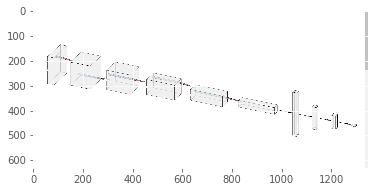

In [16]:
img = Image.open('model_visualisation.png').convert("RGB")
pixels = np.array(img)
plt.imshow(pixels)

In [ ]:
'''visualising model'''

plot_model(NotesModel, to_file='NotesModel.png')
SVG(model_to_dot(NotesModel).create(prog='dot', format='svg'))